In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with h5py.File('data.h5', 'r') as f:
    X = f['data'][()]
    y = f['labels'][()]

In [3]:
from PfyMU.features import *

In [4]:
FB = Bank(window_length=None, window_step=None)

# add features
FB + Mean()
FB + MeanCrossRate()
FB + StdDev()
FB + Skewness()
FB + Kurtosis()
FB + Range()
FB + IQR()
FB + RMS()
FB + Autocorrelation(lag=1, normalize=True)
FB + LinearSlope()
FB + SignalEntropy()
FB + SampleEntropy(m=4, r=1.0)
FB + PermutationEntropy(order=3, delay=1, normalize=True)
FB + ComplexityInvariantDistance(normalize=True)
FB + RangeCountPercentage(range_min=0, range_max=1.0)
FB + RatioBeyondRSigma(r=2.0)
FB + JerkMetric(normalize=True)
FB + DimensionlessJerk(log=True, signal_type='acceleration')
FB + SPARC()
FB + DominantFrequency(low_cutoff=0.25, high_cutoff=5.0)
FB + DominantFrequencyValue(low_cutoff=0.25, high_cutoff=5.0)
FB + PowerSpectralSum(low_cutoff=0.25, high_cutoff=5.0)
FB + SpectralFlatness(low_cutoff=0.25, high_cutoff=5.0)
FB + SpectralEntropy(low_cutoff=0.25, high_cutoff=5.0)
FB + DetailPower(wavelet='coif4', freq_band=[1.0, 3.0])
FB + DetailPowerRatio(wavelet='coif4', freq_band=[1.0, 3.0])

In [5]:
X_feat, feature_names = FB.compute(X, fs=20.0, windowed=True, columns=['pc1', 'pc2', 'pc3', 'mag'])

/home/lukasadamowicz/miniconda3/envs/pfymu/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [15]:
df = pd.DataFrame(
    index=range(X_feat.shape[0]),
    columns = ['Label'] + feature_names,
    dtype='float'
)
df['Label'] = y
df['Label'] = df.Label.astype('int')
df.iloc[:, 1:] = X_feat

In [16]:
import ppscore

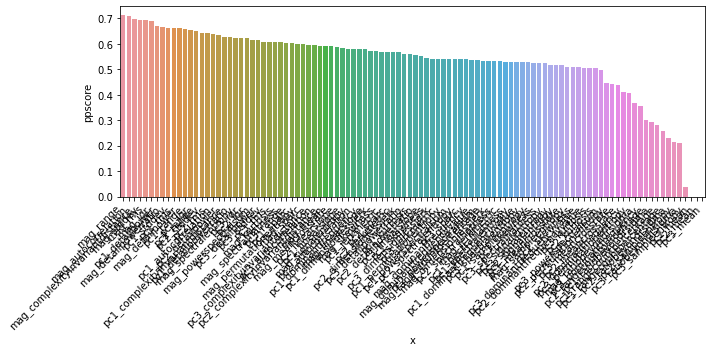

In [17]:
df_predictors = ppscore.predictors(df, 'Label', output='df')
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_predictors, x="x", y="ppscore")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

In [41]:
feats = df[['Label'] + [i for i in df.columns if 'dominant' in i]].copy()
feats['Label'] = feats.Label.astype(bool)

In [46]:
pps_matrix = ppscore.matrix(feats, output='df')

/home/lukasadamowicz/miniconda3/envs/pfymu/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lukasadamowicz/miniconda3/envs/pfymu/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lukasadamowicz/miniconda3/envs/pfymu/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/lukasadamowicz/miniconda3/envs/pfymu/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 181, in fit
    check_classification_targets(y)
  File "/home/lukasadamowicz/miniconda3/envs/pfymu/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unkn

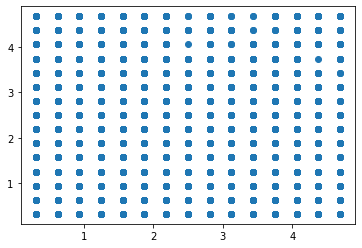

In [50]:
plt.figure()
plt.scatter(df['mag_dominantfrequency'], df['pc1_dominantfrequency'])

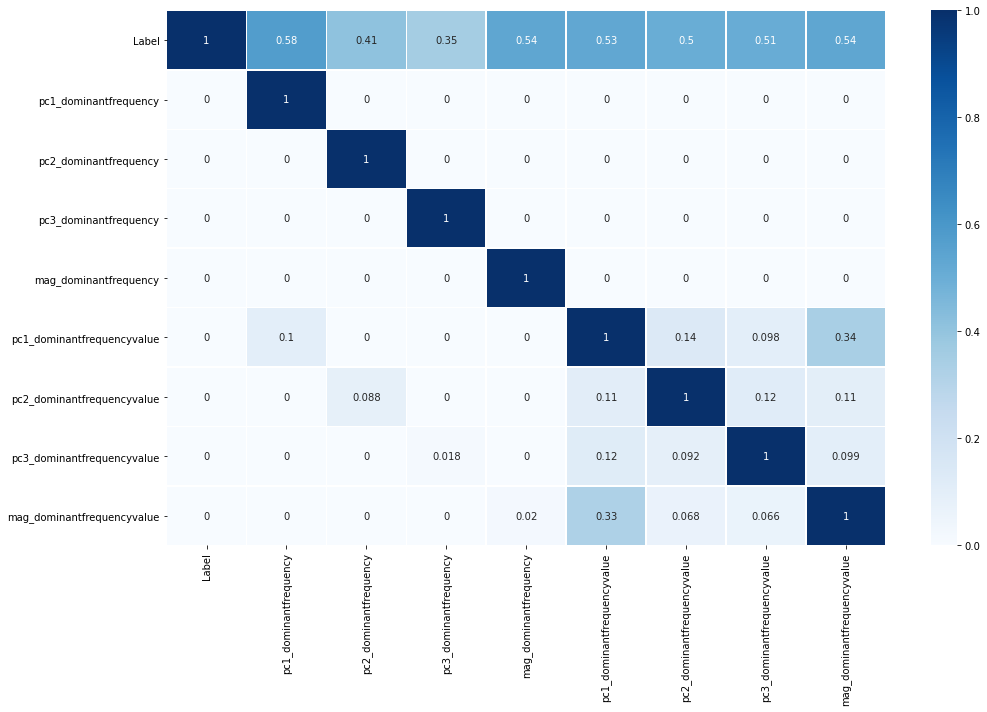

In [47]:
plt.figure(figsize=(15, 10))
sns.heatmap(pps_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.tight_layout()
# plt.savefig('PPScore_matrix.pdf')